# Analyse des prix des carburants

Voici un exemple décrit pas à pas qui montre comment on analyse des données publiques disponibles en ligne. Ici on va travailler sur le prix de différentes énergies à partir des données de la base Pégase du ministère du développement durable.

La première chose est de sauver les tables qui nous intéressent à savoir 
* les données annuelles par commune, département, secteur des inscriptions au brevet, taux de réussite.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dbpath = 'data/fr-en-dnb-par-etablissement.csv'

In [5]:
brevet_data = pd.read_csv(dbpath, sep=';')
brevet_data_no_session = pd.read_csv(dbpath, sep=';')

brevet_data.head()

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Nombre_d_admis_Mention_AB,Admis Mention bien,Admis Mention très bien,Taux de réussite
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,163,159,143,52,43,29,19,"89,90%"
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,153,143,109,49,25,21,14,"76,20%"
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE 8E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,262,256,236,63,81,59,33,"92,10%"
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE 6E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,157,153,114,46,31,24,13,"74,50%"
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,138,138,106,45,31,20,10,"76,80%"


# Cleaning data

In [6]:
# Remove leading 0 in department code
brevet_data['Code département'] = brevet_data['Code département'].map(lambda x: str(x)[1:])

# Rename mention columns
brevet_data.rename(columns = {'Nombre_d_admis_Mention_AB':'Admis Mention AB', 'Admis Mention bien':'Admis Mention B', 'Admis Mention très bien':'Admis Mention TB'}, inplace = True)

# Recompute success rate
brevet_data['Taux de réussite'] =  brevet_data['Admis'] / brevet_data['Presents']
brevet_data

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,163,159,143,52,43,29,19,0.899371
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,153,143,109,49,25,21,14,0.762238
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE 8E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,262,256,236,63,81,59,33,0.921875
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE 6E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,157,153,114,46,31,24,13,0.745098
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,138,138,106,45,31,20,10,0.768116
5,2014,0132009N,COLLEGE,CHATEAU DOUBLE,PUBLIC,13001,AIX-EN-PROVENCE,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,149,149,123,64,39,15,5,0.825503
6,2014,0132010P,LYCEE PROFESSIONNEL,GARACHON - LAMBESC,PRIVE,13050,LAMBESC,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,68,64,46,36,9,1,0,0.718750
7,2014,0132114C,COLLEGE,HENRI MARGALHAN,PRIVE,13214,MARSEILLE 14E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,90,89,72,35,15,15,7,0.808989
8,2014,0132212J,COLLEGE,FREDERIC MISTRAL,PUBLIC,13077,PORT-DE-BOUC,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,58,49,28,20,6,0,2,0.571429
9,2014,0132214L,COLLEGE,HENRI FABRE,PUBLIC,13117,VITROLLES,13,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,108,102,71,37,18,10,6,0.696078


In [7]:
brevet_data2 = brevet_data.set_index(['Session', "Numero d'etablissement"])
brevet_data2

Type d'etablissement  \
Session Numero d'etablissement                        
2014    0131711P                            COLLEGE   
        0131756N                            COLLEGE   
        0131923V                            COLLEGE   
        0131943S                            COLLEGE   
        0131968U                            COLLEGE   
        0132009N                            COLLEGE   
        0132010P                LYCEE PROFESSIONNEL   
        0132114C                            COLLEGE   
        0132212J                            COLLEGE   
        0132214L                            COLLEGE   
        0132310R                            COLLEGE   
        0132411A                            COLLEGE   
        0132412B                            COLLEGE   
        0132491M                            COLLEGE   
        0132497U                            COLLEGE   
        0132569X                LYCEE PROFESSIONNEL   
        0132732Z                            COLLEGE   
        0132785G                            COLLEGE   
        0132786H                            COLLEGE   
        0132790M                LYCEE PROFESSIONNEL   
        0132833J                            COLLEGE   
        0132834K                            COLLEGE   
        0132917A                            COLLEGE   
        0132954R                            COLLEGE   
        0133196D                            COLLEGE   
        0133278T                            COLLEGE   
        0133287C                            COLLEGE   
        0133353Z                            COLLEGE   
        0133492A                            COLLEGE   
        0133510V                            COLLEGE   
...                                             ...   
2020    0921003R                            COLLEGE   
        0921178F                            COLLEGE   
        0921181J                            COLLEGE   
        0921229L                              LYCEE   
        0921233R                            COLLEGE   
        0921234S                            COLLEGE   
        0921236U                            COLLEGE   
        0921238W                            COLLEGE   
        0921501G                            COLLEGE   
        0921502H                            COLLEGE   
        0921541A                            COLLEGE   
        0921543C                            COLLEGE   
        0921782M                            COLLEGE   
        0921868F                            COLLEGE   
        0921901S                            COLLEGE   
        0921905W                            COLLEGE   
        0921906X                            COLLEGE   
        0921907Y                            COLLEGE   
        0922256C                            COLLEGE   
        0922629H                            COLLEGE   
        0930089S                            COLLEGE   
        0930100D                            COLLEGE   
        0930135S                LYCEE PROFESSIONNEL   
        0930593P                            COLLEGE   
        0930619T                            COLLEGE   
        0930623X                            COLLEGE   
        0930831Y                LYCEE PROFESSIONNEL   
        0930858C                            COLLEGE   
        0930920V                            COLLEGE   
        0930969Y                            COLLEGE   

                                                  Patronyme  \
Session Numero d'etablissement                                
2014    0131711P                           ROCHER DU DRAGON   
        0131756N                             DARIUS MILHAUD   
        0131923V                             MARSEILLEVEYRE   
        0131943S                               PIERRE PUGET   
        0131968U                    CAILLOLS (QUARTIER DES)   
        0132009N                             CHATEAU DOUBLE   
        0132010P                         GARACHON - LAMBESC  

In [8]:
brevet_data[brevet_data["Patronyme"] == "LES FRANCS BOURGEOIS"]

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite
13455,2013,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,240,240,240,15,78,99,48,1.000000
14479,2009,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,231,230,228,30,85,88,25,0.991304
17711,2020,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,260,260,260,20,41,102,97,1.000000
40071,2014,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,258,258,258,29,81,101,47,1.000000
41923,2011,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,249,249,248,26,104,90,28,0.995984
57939,2012,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,246,246,245,17,65,102,61,0.995935
65156,2007,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,234,231,228,30,69,90,39,0.987013
73468,2017,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,255,255,254,36,34,75,109,0.996078
93499,2008,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,236,235,234,33,97,81,23,0.995745
109022,2010,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,10,ILE-DE-FRANCE,248,247,246,22,89,93,42,0.995951


In [9]:
import folium

In [10]:
france = folium.Map(location=[46.5,2], zoom_start=5, tiles='Stamen Toner')

colors = folium.Choropleth(geo_data = 'data/departements-version-simplifiee.geojson',
                           data = brevet_data,
                           columns = ['Code département', 'Taux de réussite'],
                           key_on = 'feature.properties.code',
                           fill_color = 'YlOrRd',
                           fill_opacity = 0.6,
                           line_opacity = 0.2,
                           legend_name = "Taux de réussite"
                          )
colors.add_to(france)
folium.LayerControl().add_to(france)
france

In [ ]:
#

## Number of students per session

In [11]:
brevet_data.groupby('Session')['Presents'].sum()

Session
2006    746534
2007    736961
2008    716484
2009    709965
2010    724086
2011    742462
2012    757587
2013    759891
2014    772825
2015    800531
2016    800995
2017    798720
2018    796930
2019    804116
2020    829164
Name: Presents, dtype: int64

# Number of students in 2016

In [12]:
brevet_data.loc[[2016]]['Presents'].sum()

151

# Taux de réussite par secteur (privé/public)

In [13]:
brevet_data.groupby('Secteur d\'enseignement')['Admis'].sum() / brevet_data.groupby('Secteur d\'enseignement')['Presents'].sum()

Secteur d'enseignement
-         0.833316
PRIVE     0.938826
PUBLIC    0.832538
dtype: float64

In [14]:
taux_reussite_par_annee_par_secteur = brevet_data.groupby(['Session', 'Secteur d\'enseignement'])['Admis'].sum() / brevet_data.groupby(['Session', 'Secteur d\'enseignement'])['Presents'].sum()
taux_reussite_par_annee_par_secteur = taux_reussite_par_annee_par_secteur.to_frame().reset_index()
taux_reussite_par_annee_par_secteur.columns.values[2] = "Taux de réussite"
taux_reussite_par_annee_par_secteur = taux_reussite_par_annee_par_secteur.drop(taux_reussite_par_annee_par_secteur[taux_reussite_par_annee_par_secteur["Secteur d'enseignement"] == "-"].index)
taux_reussite_par_annee_par_secteur

,Session,Secteur d'enseignement,Taux de réussite
1,2006,PRIVE,0.899843
2,2006,PUBLIC,0.763333
4,2007,PRIVE,0.916789
5,2007,PUBLIC,0.798388
7,2008,PRIVE,0.919680
8,2008,PUBLIC,0.804895
10,2009,PRIVE,0.927271
11,2009,PUBLIC,0.810302
13,2010,PRIVE,0.930900
14,2010,PUBLIC,0.818248


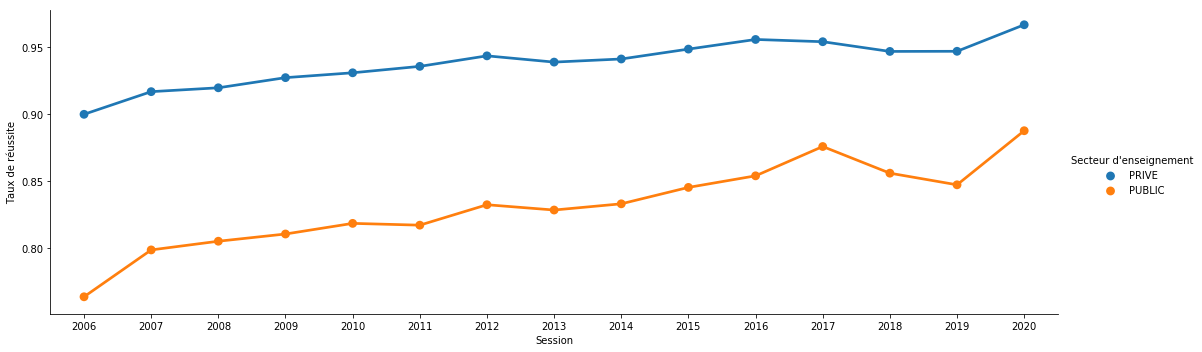

In [15]:
import seaborn as sns
sns.catplot(data=taux_reussite_par_annee_par_secteur,x='Session',hue="Secteur d'enseignement", y = "Taux de réussite", kind = 'point', aspect = 3)

Globalement le taux de réussite dans les lycées privés est plus élevé que dans les lycées publics.

Cependant l'écart se reserre, on passe d'une différence de 15% en 2006 à 7.5% en 2020.

On remarque une légère augmentation du taux réussite entre 2006 et 2020 pour les 2 secteurs.

Une chute du taux de réussite dans le secteur public est notable entre 2017 et 2019 ( -5% )

C:\Users\Jacques\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


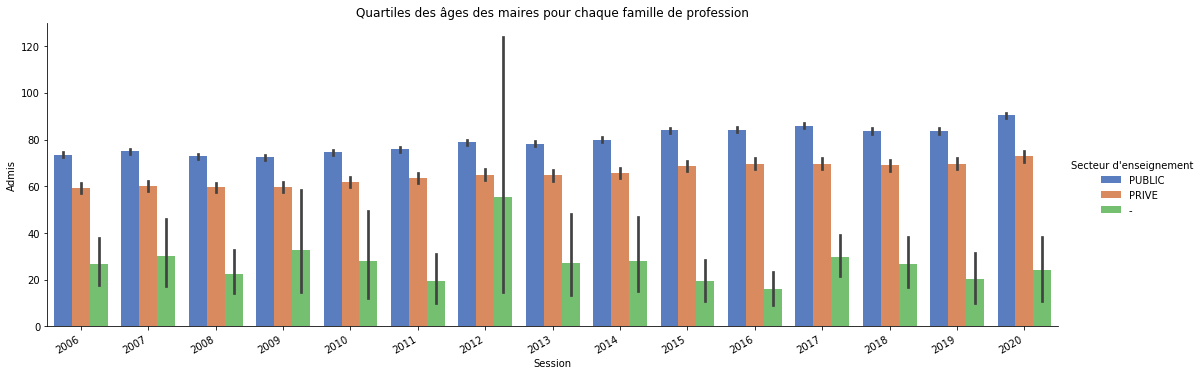

In [16]:
g = sns.catplot(data=brevet_data, x='Session', y="Admis", hue="Secteur d'enseignement", palette="muted", 
                kind='bar', aspect=3)
g.set(title="Quartiles des âges des maires pour chaque famille de profession") # Mayors' age-sex pyramid for each type of professions
g.set_xticklabels(rotation=30, ha='right')

In [17]:
réussite_secteur = brevet_data.groupby('Secteur d\'enseignement')['Taux de réussite'].mean()
réussite_secteur 

Secteur d'enseignement
-         0.773388
PRIVE     0.904286
PUBLIC    0.828145
Name: Taux de réussite, dtype: float64

<BarContainer object of 2 artists>

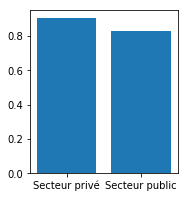

In [18]:
names = ['Secteur privé', 'Secteur public']
values = [réussite_secteur['PRIVE'], réussite_secteur['PUBLIC']]

plt.figure(figsize=(9, 3))
plt.ylabel("Taux de réussite au brevet")
plt.subplot(131)
plt.bar(names, values)

# Nombre d'inscrits par secteur

In [19]:
inscrits_secteur = brevet_data.groupby('Secteur d\'enseignement')['Inscrits'].sum()
inscrits_secteur

Secteur d'enseignement
-           10464
PRIVE     2638965
PUBLIC    9040378
Name: Inscrits, dtype: int64

# Calcul du nombre d'inscrits au brevet dans les plus grandes villes ( > 50 000 habitants ) 

In [65]:
habitant_ville = pd.read_csv('data/habitant_par_ville.csv', sep=';')
grandes_villes = habitant_ville[habitant_ville["Population municipale (historique depuis 1876) 2018"] >= 50000]["Libellé"].tolist()
grandes_villes = [each_string.upper() for each_string in grandes_villes]
grandes_villes

['SAINT-QUENTIN',
 'ANTIBES',
 'CAGNES-SUR-MER',
 'CANNES',
 'NICE',
 'TROYES',
 'NARBONNE',
 'AIX-EN-PROVENCE',
 'ARLES',
 'MARSEILLE',
 'CAEN',
 'LA ROCHELLE',
 'BOURGES',
 'DIJON',
 'BESANÇON',
 'VALENCE',
 'BREST',
 'QUIMPER',
 'AJACCIO',
 'NÎMES',
 'TOULOUSE',
 'BORDEAUX',
 'MÉRIGNAC',
 'PESSAC',
 'BÉZIERS',
 'MONTPELLIER',
 'RENNES',
 'TOURS',
 'GRENOBLE',
 'SAINT-ÉTIENNE',
 'NANTES',
 'SAINT-NAZAIRE',
 'ORLÉANS',
 'ANGERS',
 'CHOLET',
 'CHERBOURG-EN-COTENTIN',
 'REIMS',
 'NANCY',
 'LORIENT',
 'VANNES',
 'METZ',
 "VILLENEUVE-D'ASCQ",
 'DUNKERQUE',
 'LILLE',
 'ROUBAIX',
 'TOURCOING',
 'BEAUVAIS',
 'CALAIS',
 'CLERMONT-FERRAND',
 'BAYONNE',
 'PAU',
 'PERPIGNAN',
 'STRASBOURG',
 'COLMAR',
 'MULHOUSE',
 'LYON',
 'VAULX-EN-VELIN',
 'VÉNISSIEUX',
 'VILLEURBANNE',
 'LE MANS',
 'CHAMBÉRY',
 'ANNECY',
 'PARIS',
 'LE HAVRE',
 'ROUEN',
 'CHELLES',
 'MEAUX',
 'SARTROUVILLE',
 'VERSAILLES',
 'NIORT',
 'AMIENS',
 'MONTAUBAN',
 'FRÉJUS',
 'HYÈRES',
 'LA SEYNE-SUR-MER',
 'TOULON',
 'AVIGNON',
 '

In [66]:
inscrits_par_ville = []
for ville in grandes_villes:
    ## pour chaque ville je calcule le nombre d'inscrits par année depuis 2006
    sub_df = brevet_data.loc[brevet_data['Libellé commune'].str.startswith(ville)]
    sum = sub_df.groupby('Session')['Inscrits'].sum()
    inscrits_par_ville.append(sum)

Text(0.5, 1.0, "Nombre d'inscrits au brevet dans les grandes villes ( > 50 000 habitants) de 2006 à 2020")

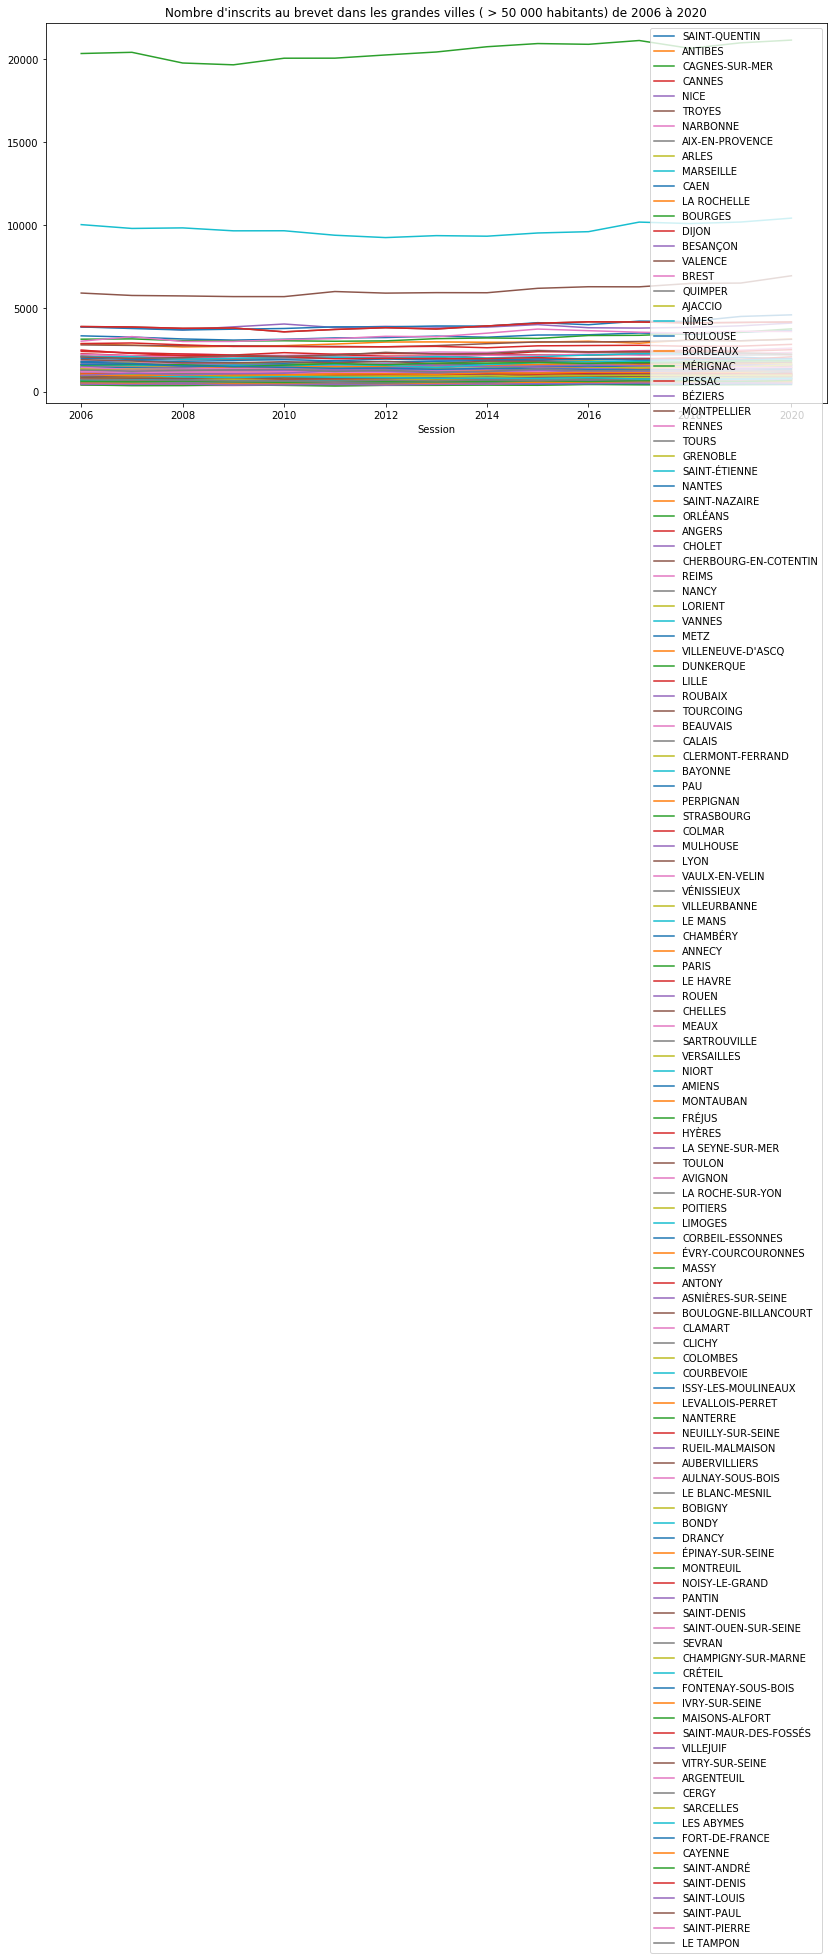

In [72]:
inscrits_par_ville_df = pd.concat(inscrits_par_ville, axis=1, keys=[s.name for s in inscrits_par_ville])
inscrits_par_ville_df.columns = grandes_villes
inscrits_par_ville_df.plot(figsize=(14, 7))
plt.title('Nombre d\'inscrits au brevet dans les grandes villes ( > 50 000 habitants) de 2006 à 2020')

Le nombre d'inscrits au brevet dans les plus grandes villes reste constant de 2006 à 2020

In [68]:
inscrits_par_ville_df['Total sur les grandes villes'] = inscrits_par_ville_df.sum(axis=1)
inscrits_par_ville_df['Total en France'] = brevet_data.groupby('Session')['Inscrits'].sum()

In [69]:
values = inscrits_par_ville_df['Total sur les grandes villes'] / inscrits_par_ville_df['Total en France'] * 100
inscrits_par_ville_df['Total grandes villes / Total France en %'] = values

In [70]:
inscrits_par_ville_df

,SAINT-QUENTIN,ANTIBES,CAGNES-SUR-MER,CANNES,NICE,TROYES,NARBONNE,AIX-EN-PROVENCE,ARLES,MARSEILLE,...,CAYENNE,SAINT-ANDRÉ,SAINT-DENIS,SAINT-LOUIS,SAINT-PAUL,SAINT-PIERRE,LE TAMPON,Total sur les grandes villes,Total en France,Total grandes villes / Total France en %
Session,,,,,,,,,,,,,,,,,,,,,
2006,899,894,419,929,3888,1014,914,2142,823,10045,...,1009,NaN,3915,977,2078,3034,1304,182002.0,760023,23.946907
2007,853,854,430,965,3846,1047,821,1999,798,9815,...,956,NaN,3887,1109,2000,3310,1231,179151.0,751993,23.823493
2008,830,777,415,874,3723,924,753,1995,757,9849,...,1000,NaN,3807,1011,2046,3017,1270,174366.0,732423,23.806735
2009,798,838,462,969,3896,1062,793,1955,773,9672,...,1005,NaN,3827,1073,2177,3017,1304,173335.0,727846,23.814790
2010,874,857,430,946,4067,985,764,1952,774,9676,...,1013,NaN,3597,1105,2128,3132,1344,174507.0,742747,23.494810
2011,887,900,472,987,3857,1030,858,2042,746,9407,...,1056,NaN,3740,1273,2195,3186,1211,176114.0,761182,23.136911
2012,900,877,420,1005,3925,938,859,1971,784,9265,...,1073,NaN,3844,1229,2362,3326,1282,176496.0,768890,22.954649
2013,893,814,434,984,3882,964,885,1985,739,9383,...,1042,NaN,3768,1138,2265,3302,1185,177456.0,770740,23.024107
2014,864,894,426,949,3882,988,854,1940,750,9349,...,1135,NaN,3950,1203,2288,3516,1214,179703.0,783640,22.931831


Text(0.5, 1.0, 'Total grandes villes / Total France en %')

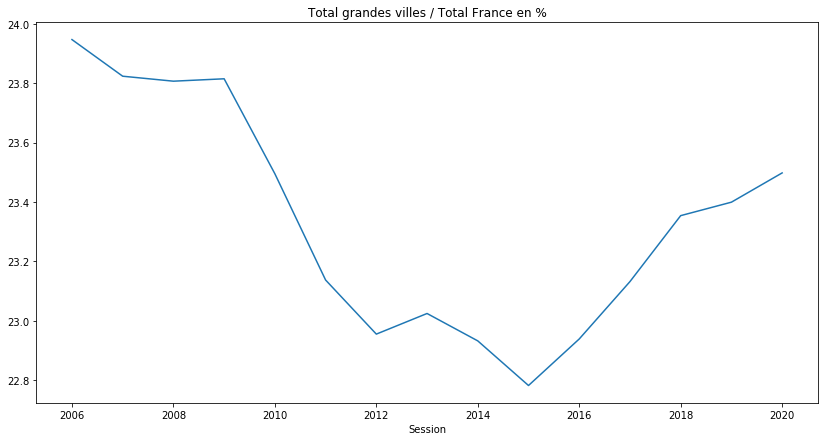

In [71]:
inscrits_par_ville_df['Total grandes villes / Total France en %'].plot(figsize=(14, 7))
plt.title('Total grandes villes / Total France en %')

On peut remarquer une baisse de 1.2 %  du nombre d'inscrits au brevet dans les grandes villes de 2006 à 2016